# Introduction
Parkinson’s disease (PD) is the second most common neurodegenerative disease after Alzheimer’s disease . The prevalence of PD is 1% among people over the age of 60 years and 4% among those over the age of 80 years . Approximately one to two people out of every 1,000 suffer from PD . The number of PD patients is increasing in parallel with the increase in the elderly population. Globally, the number of PD patients has doubled between 1990 and 2015, with approximately 6.2 million individuals affected . Since 1990, the age-standardized prevalence rate (ASR) increased by 21.7% .

Early detection and treatment are important for patients with PD. There is no reliable diagnostic test currently, and PD identification is based primarily on clinical criteria . **Traditionally**, the early diagnosis of PD is based on interviews with the patient followed by careful neurological examinations. So far there is no intelligent computing approach collecting different symptoms for speeding up the diagnosis of the disease. Telediagnosis and telemonitoring approaches **recently** introduced represent non-intelligent methods for diagnosing PD and these systems are unable to solve complex problems based on data-intensive learning. It could therefore be useful to develop automated systems to help in the early diagnosis of PD.

**Machine learning (ML)** has been extensively used in a variety of applications requiring data collected in some specific format. Data-intensive problems can be solved using statistical models and learning-based solutions. Healthcare applications have also successfully adopted these approaches.



# Importing Libraries

In [1]:
!pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29256 sha256=ba793c827ec946768525a0b220cc660108fe1a2b0ad0e781b7f144599d49e3a4
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from skrebate import ReliefF

# Import Data

In [31]:
# Load the dataset
data = pd.read_csv("/content/pd_speech_features.csv", header=1)
df=data.copy()
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


# EDA

## Dataset Overview
Below is a description of each column in the dataset:

### General Information:
- **id**: Unique identifier for each instance or recording.
- **gender**: Gender of the person (Male/Female).
- **PPE**: Personal Protective Equipment usage (binary/categorical variable indicating whether the individual is wearing PPE).

### Audio Feature Extraction:
- **DFA**: Detrended Fluctuation Analysis, used to detect long-term statistical dependence in signals.
- **RPDE**: Recurrence Period Density Entropy, a feature used for detecting periodicity or irregularity in speech.
- **numPulses**: The number of pulses detected in the audio signal, indicating periodicity in speech.
- **numPeriodsPulses**: Number of periods in the pulses within the signal.
- **meanPeriodPulses**: The average time interval (period) between pulses in the speech signal.
- **stdDevPeriodPulses**: The standard deviation of the pulse periods, reflecting the variability in speech signal.

### Jitter and Shimmer (Voice Perturbation Measures):
These features are used to analyze the stability and perturbations in the voice signal.
- **locPctJitter**: Local percentage jitter, a measure of short-term variability in pitch.
- **locAbsJitter**: Local absolute jitter, a measure of absolute variation in pitch.
- **rapJitter**: Relative Average Perturbation in pitch, another jitter measure.
- **ppq5Jitter**: 5-point Period Perturbation Quotient for jitter.
- **ddpJitter**: Difference in degree of pitch variation across the signal.
- **locShimmer**: Local shimmer, which quantifies the amplitude variability in speech.
- **locDbShimmer**: Local shimmer measured in decibels.
- **apq3Shimmer**: Average Perturbation Quotient for 3-point intervals in shimmer.
- **apq5Shimmer**: Average Perturbation Quotient for 5-point intervals in shimmer.
- **apq11Shimmer**: Average Perturbation Quotient for 11-point intervals in shimmer.
- **ddaShimmer**: Differential asymmetry shimmer, a measure of amplitude fluctuation.

### Harmonicity and Noise Features:
- **meanAutoCorrHarmonicity**: The mean of the autocorrelation-based harmonicity of the signal, indicating periodicity.
- **meanNoiseToHarmHarmonicity**: The mean ratio of noise to harmonic content in the signal.
- **meanHarmToNoiseHarmonicity**: The mean ratio of harmonic to noise content, indicating the clarity of the speech signal.

### Intensity Features:
- **minIntensity**: The minimum intensity level of the speech signal.
- **maxIntensity**: The maximum intensity level.
- **meanIntensity**: The average intensity of the signal during the recording.

### Frequency and Time Domain Features:
- **f1, f2, f3, f4**: Specific frequency bands or components extracted from the speech signal.
- **b1, b2, b3, b4**: Additional frequency bands or coefficients related to the signal.

### Frequency Spectrum Features:
- **GQ_prc5_95**: Feature related to the 5-95 percentile range of the frequency spectrum.
- **GQ_std_cycle_open**: Standard deviation of open-cycle signal features in the frequency domain.
- **GQ_std_cycle_closed**: Standard deviation of closed-cycle signal features.

### Non-Linear Energy Operators (GNE, VFER, IMF):
- **GNE_mean, GNE_std, GNE_SNR_TKEO, GNE_SNR_SEO**: Features derived from Generalized Non-Linear Energy (GNE), capturing signal non-linearities.
- **VFER_mean, VFER_std, VFER_entropy**: Voice Fractal Energy (VFER) features that measure the complexity and irregularity of the speech signal.
- **IMF_SNR_SEO, IMF_SNR_TKEO**: Signal-to-Noise Ratios related to Intrinsic Mode Functions (IMF) in different signal processing domains.

### Mel Frequency Cepstral Coefficients (MFCCs):
MFCCs are widely used features for speech analysis.
- **mean_MFCC_0th_coef to mean_MFCC_12th_coef**: Mean values of the first 13 MFCC coefficients, representing the spectral characteristics of the speech signal.
- **mean_delta_MFCC_0th_coef to mean_delta_MFCC_12th_coef**: Mean of the first derivatives (rate of change) of the MFCC coefficients.
- **mean_delta_delta_MFCC_0th_coef to mean_delta_delta_MFCC_12th_coef**: Mean of the second derivatives (acceleration) of the MFCC coefficients.

### Entropy and TKEO (Teager-Kaiser Energy Operator):
- **det_entropy_shannon_1_coef to det_entropy_shannon_10_coef**: Shannon entropy measures applied to various components of the signal.
- **det_TKEO_mean_1_coef to det_TKEO_std_10_coef**: Features based on the Teager-Kaiser Energy Operator (TKEO) used for energy-based analysis of the signal.
- **app_entropy_shannon_1_coef to app_entropy_shannon_10_coef**: Similar entropy measures applied to the approximated components of the signal.
- **app_TKEO_mean_1_coef to app_TKEO_std_10_coef**: TKEO-based features applied to the approximated signal components.

### Time-Scale Modifications (QWT Decomposition):
- **tqwt_energy_dec_1 to tqwt_energy_dec_36**: Energy features related to the QWT decomposition of the speech signal.
- **tqwt_entropy_shannon_dec_1 to tqwt_entropy_shannon_dec_36**: Shannon entropy features derived from the time-frequency decomposition.
- **tqwt_entropy_log_dec_1 to tqwt_entropy_log_dec_36**: Logarithmic entropy features related to the QWT decomposition.

### Other Specific Features:
- **Ea, Ed_1_coef, Ed_2_coef, Ed_3_coef, ...**: Energy distribution features extracted from the speech signal.
- **det_LT_entropy_shannon_1_coef to det_LT_entropy_shannon_10_coef**: Long-term entropy features indicating the overall signal characteristics over time.
- **app_LT_entropy_shannon_1_coef to app_LT_entropy_shannon_10_coef**: Approximate long-term entropy features.
- **tqwt_energy_dec_1 to tqwt_energy_dec_36**: Additional energy-based features derived from time-frequency analysis of the signal.

These features are extracted from speech signals and are primarily used for analyzing voice perturbations that are indicative of Parkinson's disease.


In [6]:
print(df.dtypes)

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object


In [7]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


## Target Distribution

In [8]:
condition = ["Does not have Parkinson's","Does have Parkinson's"]

have_or_not = df["class"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = df["class"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether the patient has Parkinson's or not")
fig.show()

##Distribution of PD by Gender

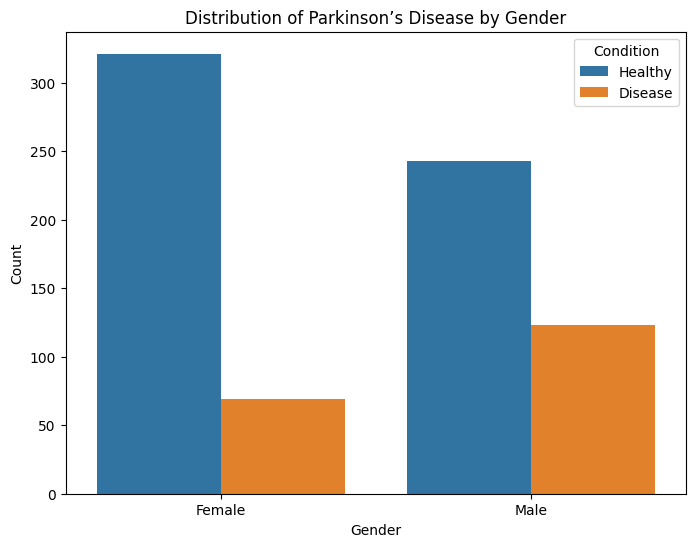

gender_label  Female  Male
class_label               
Disease           69   123
Healthy          321   243


In [9]:
# Create temporary mappings for visualization and analysis
temp_df = df.copy()
temp_df['class_label'] = temp_df['class'].map({1: 'Healthy', 0: 'Disease'})
temp_df['gender_label'] = temp_df['gender'].map({0: 'Male', 1: 'Female'})

# Plotting the relationship between gender and sickness
plt.figure(figsize=(8, 6))
sns.countplot(x='gender_label', hue='class_label', data=temp_df)
plt.title('Distribution of Parkinson’s Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Condition', loc='upper right')
plt.show()

# Crosstab for analysis
cross_table = pd.crosstab(temp_df["class_label"], temp_df["gender_label"])
print(cross_table)


=>The dataset contains 390 females and 366 males.


=> 64.06% of individuals with Parkinson's disease are **male** (123 out of 192), while 35.93% are **female** (69 out of 192). For healthy individuals, 56.91% are **female** (321 out of 564) and 43.08% are **male** (243 out of 564).

# Define Target and models

In [10]:
# Separate the features and target
X = df.drop(columns=['class'])
y = df['class']

## Model Selection and Feature Selection

Three different models have been chosen for this task: **K-Nearest Neighbors (KNN), Random Forest, and AdaBoost.**

The KNN model is based on instance-based learning, while the Random Forest model is built using bagging (Bootstrap Aggregating), which improves accuracy by averaging multiple decision trees. AdaBoost is an ensemble method based on boosting, where weak learners are combined to form a strong classifier.

**Grid Search** will be used to optimize the hyperparameters of these models, and  **ReliefF** will be applied for feature selection, with the top 10 features being selected.


# Training

In [11]:
# Initialize the models
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

In [12]:
# Grid Search parameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],

}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R'],

}


## With Scaling

In [13]:
# Create lists to store the accuracy scores of each model
knn_sc = []
rf_sc = []
ada_sc = []

In [14]:
# Initialize the DataFrame to store the results for each iteration
columns = ['Iteration', 'Selected Features', 'KNN Score', 'Random Forest Score', 'AdaBoost Score']
results_df = pd.DataFrame(columns=columns)

# Run the loop 10 times with different train-test splits
for i in range(10):
    print(f"Running iteration {i+1}...")

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=None)

    # Convert X_train to NumPy arrays for ReliefF
    X_train_array = X_train.values
    y_train_array = y_train.values

    # Perform ReliefF feature selection on the training set
    relief = ReliefF(n_neighbors=10)
    relief.fit(X_train_array, y_train_array)
    feature_importances = relief.feature_importances_

    # Select the top 10 features based on ReliefF
    top_10_features = np.argsort(feature_importances)[-10:]
    selected_features = X.columns[top_10_features]

    # Subset the data with selected features
    X_train_relief = X_train[selected_features]
    X_test_relief = X_test[selected_features]

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_relief)
    X_test_scaled = scaler.transform(X_test_relief)

    # KNN with GridSearchCV
    knn_grid = GridSearchCV(knn, knn_param_grid, cv=5)
    knn_grid.fit(X_train_scaled, y_train)
    best_knn = knn_grid.best_estimator_
    knn_test_score = accuracy_score(y_test, best_knn.predict(X_test_scaled))
    knn_sc.append(knn_test_score)

    # Random Forest with GridSearchCV
    rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)
    rf_grid.fit(X_train_scaled, y_train)
    best_rf = rf_grid.best_estimator_
    rf_test_score = accuracy_score(y_test, best_rf.predict(X_test_scaled))
    rf_sc.append(rf_test_score)

    # AdaBoost with GridSearchCV
    ada_grid = GridSearchCV(ada, ada_param_grid, cv=5)
    ada_grid.fit(X_train_scaled, y_train)
    best_ada = ada_grid.best_estimator_
    ada_test_score = accuracy_score(y_test, best_ada.predict(X_test_scaled))
    ada_sc.append(ada_test_score)

    # Prepare a DataFrame for the current iteration
    current_iteration_df = pd.DataFrame([{
        'Iteration': i + 1,
        'Selected Features': ', '.join(selected_features),
        'KNN Score': knn_test_score,
        'Random Forest Score': rf_test_score,
        'AdaBoost Score': ada_test_score
    }])

    # Concatenate the results for the current iteration with the main results DataFrame
    results_df = pd.concat([results_df, current_iteration_df], ignore_index=True)



Running iteration 1...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorith

Running iteration 2...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 3...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 4...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 5...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 6...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 7...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 8...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 9...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 10...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

In [15]:
# Display the results table
results_df

,Iteration,Selected Features,KNN Score,Random Forest Score,AdaBoost Score
0,1,"tqwt_entropy_shannon_dec_19, mean_MFCC_5th_coe...",0.861842,0.828947,0.796053
1,2,"tqwt_entropy_log_dec_31, tqwt_entropy_log_dec_...",0.868421,0.835526,0.776316
2,3,"tqwt_TKEO_std_dec_18, tqwt_minValue_dec_19, tq...",0.763158,0.815789,0.769737
3,4,"tqwt_stdValue_dec_19, tqwt_energy_dec_18, tqwt...",0.835526,0.822368,0.789474
4,5,"tqwt_minValue_dec_18, tqwt_energy_dec_18, tqwt...",0.822368,0.835526,0.789474
5,6,"tqwt_energy_dec_17, tqwt_stdValue_dec_18, tqwt...",0.855263,0.861842,0.815789
6,7,"tqwt_entropy_log_dec_32, tqwt_entropy_log_dec_...",0.822368,0.835526,0.730263
7,8,"tqwt_TKEO_std_dec_18, tqwt_entropy_shannon_dec...",0.828947,0.809211,0.789474
8,9,"tqwt_entropy_log_dec_36, tqwt_entropy_log_dec_...",0.855263,0.861842,0.809211
9,10,"tqwt_stdValue_dec_17, tqwt_entropy_log_dec_32,...",0.868421,0.861842,0.789474


In [27]:
# Display the selected features for each iteration
for index, row in results_df.iterrows():
    print(f"Iteration {row['Iteration']}: {row['Selected Features']}")


Iteration 1: tqwt_entropy_shannon_dec_19, mean_MFCC_5th_coef, tqwt_energy_dec_18, tqwt_medianValue_dec_36, tqwt_entropy_log_dec_31, tqwt_entropy_log_dec_32, tqwt_entropy_log_dec_26, tqwt_meanValue_dec_36, tqwt_entropy_log_dec_27, tqwt_entropy_log_dec_28
Iteration 2: tqwt_entropy_log_dec_31, tqwt_entropy_log_dec_32, tqwt_medianValue_dec_36, tqwt_energy_dec_18, tqwt_TKEO_std_dec_18, mean_MFCC_5th_coef, tqwt_stdValue_dec_18, tqwt_meanValue_dec_36, tqwt_entropy_log_dec_27, tqwt_entropy_log_dec_28
Iteration 3: tqwt_TKEO_std_dec_18, tqwt_minValue_dec_19, tqwt_TKEO_mean_dec_18, tqwt_minValue_dec_18, tqwt_energy_dec_18, tqwt_stdValue_dec_19, tqwt_entropy_shannon_dec_19, tqwt_stdValue_dec_18, tqwt_entropy_log_dec_27, tqwt_entropy_log_dec_28
Iteration 4: tqwt_stdValue_dec_19, tqwt_energy_dec_18, tqwt_medianValue_dec_36, tqwt_entropy_log_dec_32, tqwt_entropy_log_dec_31, tqwt_entropy_shannon_dec_19, tqwt_meanValue_dec_36, tqwt_entropy_log_dec_26, tqwt_entropy_log_dec_28, tqwt_entropy_log_dec_27
It

## Without Scaling

In [16]:
# Initialize the lists to store the test scores for each model
knn_unsc = []
rf_unsc = []
ada_unsc = []

In [17]:
# Initialize the DataFrame to store the results for each iteration
columns = ['Iteration', 'Selected Features', 'KNN Score', 'Random Forest Score', 'AdaBoost Score']
results_df_unscaled = pd.DataFrame(columns=columns)

# Run the loop 10 times with different train-test splits
for i in range(10):
    print(f"Running iteration {i+1}...")

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=None)

    # Convert X_train to NumPy arrays for ReliefF
    X_train_array = X_train.values
    y_train_array = y_train.values

    # Perform ReliefF feature selection on the training set
    relief = ReliefF(n_neighbors=10)  # ReliefF algorithm with 10 neighbors
    relief.fit(X_train_array, y_train_array)
    feature_importances = relief.feature_importances_

    # Select the top 10 features based on ReliefF
    top_10_features = np.argsort(feature_importances)[-10:]  # Indices of the top 10 features
    selected_features = X.columns[top_10_features]  # Feature names of the top 10 features

    # Subset the data with selected features
    X_train_relief = X_train[selected_features]
    X_test_relief = X_test[selected_features]

    # KNN with GridSearchCV
    knn_grid = GridSearchCV(knn, knn_param_grid, cv=5)
    knn_grid.fit(X_train_relief, y_train)
    best_knn = knn_grid.best_estimator_
    knn_test_score = accuracy_score(y_test, best_knn.predict(X_test_relief))
    knn_unsc.append(knn_test_score)

    # Random Forest with GridSearchCV
    rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)
    rf_grid.fit(X_train_relief, y_train)
    best_rf = rf_grid.best_estimator_
    rf_test_score = accuracy_score(y_test, best_rf.predict(X_test_relief))
    rf_unsc.append(rf_test_score)

    # AdaBoost with GridSearchCV
    ada_grid = GridSearchCV(ada, ada_param_grid, cv=5)
    ada_grid.fit(X_train_relief, y_train)
    best_ada = ada_grid.best_estimator_
    ada_test_score = accuracy_score(y_test, best_ada.predict(X_test_relief))
    ada_unsc.append(ada_test_score)

    # Prepare a DataFrame for the current iteration
    current_iteration_df = pd.DataFrame([{
        'Iteration': i + 1,
        'Selected Features': ', '.join(selected_features),
        'KNN Score': knn_test_score,
        'Random Forest Score': rf_test_score,
        'AdaBoost Score': ada_test_score
    }])

    # Concatenate the results for the current iteration with the main results DataFrame
    results_df_unscaled = pd.concat([results_df_unscaled, current_iteration_df], ignore_index=True)


Running iteration 1...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 2...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 3...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 4...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 5...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 6...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 7...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 8...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 9...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

Running iteration 10...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

In [18]:
# Display the results table
results_df_unscaled


,Iteration,Selected Features,KNN Score,Random Forest Score,AdaBoost Score
0,1,"tqwt_energy_dec_17, tqwt_entropy_log_dec_32, t...",0.848684,0.868421,0.828947
1,2,"tqwt_medianValue_dec_36, tqwt_entropy_log_dec_...",0.763158,0.855263,0.809211
2,3,"tqwt_medianValue_dec_36, tqwt_energy_dec_17, t...",0.802632,0.828947,0.782895
3,4,"tqwt_TKEO_std_dec_18, tqwt_stdValue_dec_18, tq...",0.796053,0.848684,0.796053
4,5,"tqwt_entropy_log_dec_32, tqwt_entropy_log_dec_...",0.782895,0.796053,0.789474
5,6,"mean_MFCC_5th_coef, tqwt_entropy_log_dec_33, t...",0.842105,0.894737,0.815789
6,7,"tqwt_entropy_log_dec_26, tqwt_medianValue_dec_...",0.736842,0.769737,0.730263
7,8,"tqwt_energy_dec_17, mean_MFCC_5th_coef, tqwt_e...",0.769737,0.835526,0.763158
8,9,"std_6th_delta, tqwt_entropy_shannon_dec_19, tq...",0.796053,0.868421,0.855263
9,10,"tqwt_entropy_shannon_dec_19, mean_MFCC_5th_coe...",0.822368,0.868421,0.828947


In [28]:
# Display the selected features for each iteration
for index, row in results_df_unscaled.iterrows():
    print(f"Iteration {row['Iteration']}: {row['Selected Features']}")

Iteration 1: tqwt_energy_dec_17, tqwt_entropy_log_dec_32, tqwt_stdValue_dec_18, tqwt_entropy_log_dec_31, tqwt_medianValue_dec_36, tqwt_meanValue_dec_36, tqwt_entropy_log_dec_26, tqwt_energy_dec_18, tqwt_entropy_log_dec_28, tqwt_entropy_log_dec_27
Iteration 2: tqwt_medianValue_dec_36, tqwt_entropy_log_dec_32, tqwt_stdValue_dec_18, DFA, tqwt_meanValue_dec_36, mean_MFCC_5th_coef, tqwt_entropy_log_dec_26, tqwt_energy_dec_18, tqwt_entropy_log_dec_28, tqwt_entropy_log_dec_27
Iteration 3: tqwt_medianValue_dec_36, tqwt_energy_dec_17, tqwt_entropy_log_dec_26, tqwt_entropy_log_dec_31, tqwt_meanValue_dec_36, tqwt_entropy_log_dec_32, mean_MFCC_5th_coef, tqwt_energy_dec_18, tqwt_entropy_log_dec_28, tqwt_entropy_log_dec_27
Iteration 4: tqwt_TKEO_std_dec_18, tqwt_stdValue_dec_18, tqwt_entropy_log_dec_31, tqwt_entropy_shannon_dec_19, tqwt_entropy_log_dec_32, tqwt_medianValue_dec_36, tqwt_entropy_log_dec_26, tqwt_entropy_log_dec_28, tqwt_entropy_log_dec_27, tqwt_meanValue_dec_36
Iteration 5: tqwt_entro

# Model Performance Comparison:


In [19]:
# Add a new column to each DataFrame to indicate whether the data was scaled or unscaled
results_df_unscaled['Scaling'] = 'Unscaled'
results_df['Scaling'] = 'Scaled'

# Concatenate the two DataFrames
results_df_combined = pd.concat([results_df_unscaled, results_df], ignore_index=True)

# Reorder the columns to make it easier to compare
results_df_combined = results_df_combined[['Iteration', 'Scaling', 'Selected Features', 'KNN Score', 'Random Forest Score', 'AdaBoost Score']]


In [20]:
results_df_combined

,Iteration,Scaling,Selected Features,KNN Score,Random Forest Score,AdaBoost Score
0,1,Unscaled,"tqwt_energy_dec_17, tqwt_entropy_log_dec_32, t...",0.848684,0.868421,0.828947
1,2,Unscaled,"tqwt_medianValue_dec_36, tqwt_entropy_log_dec_...",0.763158,0.855263,0.809211
2,3,Unscaled,"tqwt_medianValue_dec_36, tqwt_energy_dec_17, t...",0.802632,0.828947,0.782895
3,4,Unscaled,"tqwt_TKEO_std_dec_18, tqwt_stdValue_dec_18, tq...",0.796053,0.848684,0.796053
4,5,Unscaled,"tqwt_entropy_log_dec_32, tqwt_entropy_log_dec_...",0.782895,0.796053,0.789474
5,6,Unscaled,"mean_MFCC_5th_coef, tqwt_entropy_log_dec_33, t...",0.842105,0.894737,0.815789
6,7,Unscaled,"tqwt_entropy_log_dec_26, tqwt_medianValue_dec_...",0.736842,0.769737,0.730263
7,8,Unscaled,"tqwt_energy_dec_17, mean_MFCC_5th_coef, tqwt_e...",0.769737,0.835526,0.763158
8,9,Unscaled,"std_6th_delta, tqwt_entropy_shannon_dec_19, tq...",0.796053,0.868421,0.855263
9,10,Unscaled,"tqwt_entropy_shannon_dec_19, mean_MFCC_5th_coe...",0.822368,0.868421,0.828947


                 Model   Scaling      mean       max       min
0       AdaBoost Score    Scaled  0.785526  0.815789  0.730263
1       AdaBoost Score  Unscaled  0.800000  0.855263  0.730263
2            KNN Score    Scaled  0.838158  0.868421  0.763158
3            KNN Score  Unscaled  0.796053  0.848684  0.736842
4  Random Forest Score    Scaled  0.836842  0.861842  0.809211
5  Random Forest Score  Unscaled  0.843421  0.894737  0.769737


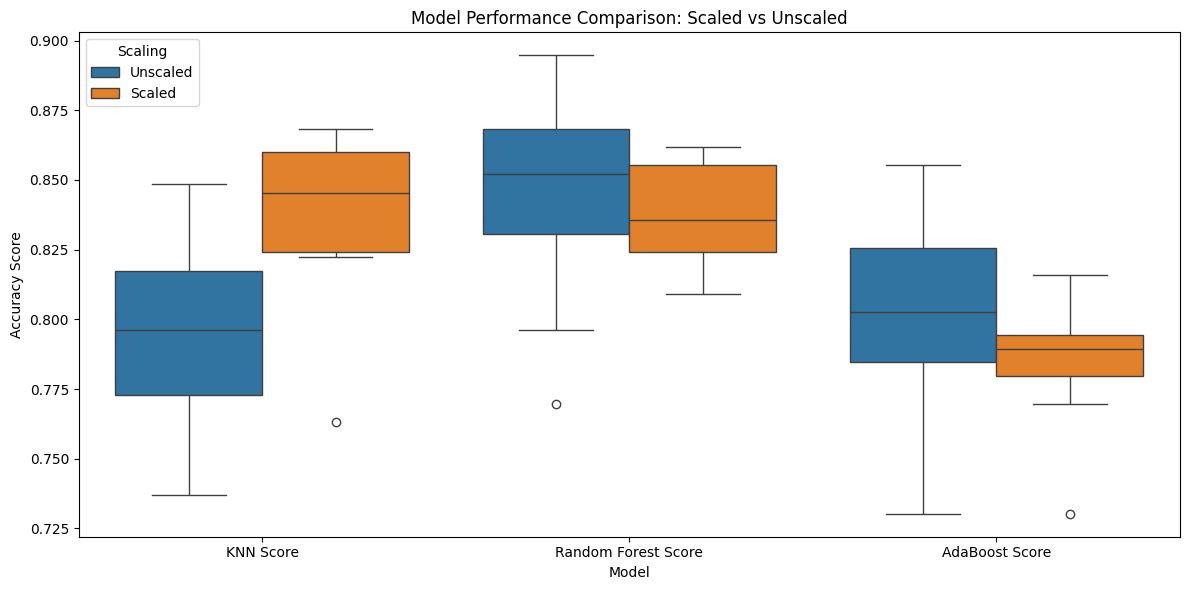

In [24]:
# Melt the DataFrame for easier plotting with seaborn
results_melted = results_df_combined.melt(id_vars=['Iteration', 'Scaling'],
                                           value_vars=['KNN Score', 'Random Forest Score', 'AdaBoost Score'],
                                           var_name='Model', value_name='Score')

# Calculate statistics for each model and scaling option
stats = results_melted.groupby(['Model', 'Scaling'])['Score'].agg(['mean', 'max', 'min']).reset_index()

# Print the statistics
print(stats)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_melted, x='Model', y='Score', hue='Scaling')



# Set plot labels and title
plt.title('Model Performance Comparison: Scaled vs Unscaled')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.legend(title='Scaling', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

---
## Mean Accuracy Comparison:
### 1. **AdaBoost**:
- **Scaled**: 78.55%
- **Unscaled**: 80.00%

**Comparison**:  
AdaBoost performs **slightly better** in the unscaled condition, with a mean accuracy of 80.00% compared to 78.55% when scaled. This difference suggests that **scaling has a minimal impact** on AdaBoost's performance, and the model might be slightly more effective with raw, unscaled features.

---

### 2. **KNN**:
- **Scaled**: 83.82%
- **Unscaled**: 79.61%

**Comparison**:  
KNN shows a **significant improvement** in performance when the data is scaled. The mean accuracy increases from 79.61% (unscaled) to 83.82% (scaled). This is a clear indication that **scaling is crucial** for KNN, as it helps the model make more accurate classifications by treating all features equally.

---

### 3. **Random Forest**:
- **Scaled**: 83.68%
- **Unscaled**: 84.34%

**Comparison**:  
Random Forest's mean accuracy is **slightly higher** when unscaled (84.34%) compared to when scaled (83.68%). However, the difference is **minimal**, indicating that scaling does not significantly affect the performance of Random Forest. The model's performance appears relatively stable regardless of whether the data is scaled or not.

---



# **Conclusion**:

- **Scaling has the most significant effect on KNN**, where it leads to a substantial improvement in mean accuracy. This is because **KNN (K-Nearest Neighbors)** is a distance-based algorithm. It relies on calculating the distance between points  to classify them. If features are on different scales, features with larger ranges dominate the distance calculation, leading to biased results. Scaling standardizes all features to the same range, ensuring that no single feature disproportionately affects the model's performance, resulting in more accurate classifications.

- **AdaBoost** is relatively **insensitive to scaling**, with a small improvement when unscaled. AdaBoost works by combining multiple weak learners (typically decision trees), and its performance mainly depends on the ability of these learners to identify complex patterns in the data. Since decision trees are not distance-based and are insensitive to feature scaling (they partition data based on feature thresholds), scaling has little to no effect on AdaBoost's performance.

- **Random Forest** shows **minimal variation** in performance between scaled and unscaled data, with a slight edge when unscaled. Similar to AdaBoost, **Random Forest** is based on decision trees, which are not affected by the scale of the features. Trees split the data based on feature values and not on distances, so scaling doesn't significantly impact their ability to partition the data. The slight difference observed may be due to inherent randomness in the forest and how it handles the data.

### **Best Model for Parkinson's Disease Classification**:

- Based on the **mean accuracy**, **Random Forest** performed the best in classifying Parkinson's disease with a mean accuracy of **84.34%** in the unscaled condition, which is slightly higher than the other models. Its ability to aggregate results from multiple decision trees helps improve performance by reducing overfitting and capturing a broad range of patterns in the data.

### **Overall Summary**:

- **For KNN**, scaling is essential due to the distance-based nature of the algorithm, where unscaled features can lead to incorrect distance calculations.
- **For AdaBoost and Random Forest**, scaling has minimal or no impact because both are tree-based algorithms that are not influenced by the scale of the features.
- **Random Forest** performed the best in the classification task, making it the most effective model for Parkinson's disease classification in this analysis.


#References
National Center on Birth Defects and Developmental Disabilities, Public Health Genomics Branch in the Division of Blood Disorders and Public Health Genomics



**Work done by Ikbel Ghrab**